In [15]:
#(binary classifier)Perceptron->training the perceptron->2 hyperparameters

In [38]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn import datasets

# import some data to play with
X,y = datasets.load_iris(return_X_y=True)

In [39]:
import numpy as np
X = X[:, :2]  # we only take the first two features.
newX = []
newy = []
for xi , yi in zip(X,y):
  if yi < 2:
    newX.append(xi)
    newy.append(yi)

X= np.array(newX)
y= np.array(newy)#the first two categories


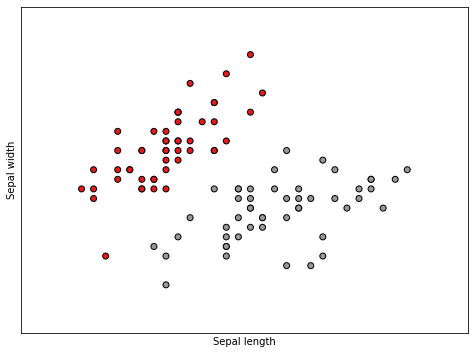

In [40]:
x_min,x_max=X[:,0].min()-0.5,X[:,0].max()+0.5
y_min,y_max=X[:, 1].min()-0.5,X[:, 1].max()+0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()



In [26]:
import numpy as np
#hyperparameter:learning rate and n_iter(num og repetitions of trainning process)
class Perceptron:
 def __init__(self,learning_rate=0.1, n_iter = 1000):#define both
   self.learning_rate=learning_rate
   self.n_iter=n_iter
   self._b=0.0
   self._w=None
   self.missclassified_samples=[]

#core which actually train the model is fit as:
 def fit(self,x:np.array,y:np.array):
   self._b=0.0
   self._w=np.zeros(x.shape[1])
   self.misclassified_samples=[]
   
   for _ in range(self.n_iter):
    errors=0
    for xi,yi in zip(x,y):
      update=self.learning_rate*(yi-self.predict(xi))
      self._b+=update
      self._w+=update*xi
      errors+=int(update!=0.0)
      self.misclassified_samples.append(errors)
#predicts output (0 or 1)
 def f(self,x:np.array)->float:
  return np.dot(x,self._w)+self._b
  
 def predict(self,x:np.array)->int:
  return np.where(self.f(x)>=0.0,1,0)



In [41]:
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score

params = {
    "learning_rate":[0.01,0.1,0.5]
}
clf = Perceptron(learning_rate=.1)#change to run and select
x_train , x_test , y_train , y_test = train_test_split( X , y , test_size=.3)

clf.fit(x_train , y_train)


print( accuracy_score(y_test , clf.predict(x_test)))

1.0
